### reference1:
[https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925](http://) 
github: [https://github.com/priya-dwivedi/Deep-Learning/blob/master/topic_modeling/LDA_Newsgroup.ipynb](http://) 

### reference2: 
[https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc](http://) github: [https://github.com/FelixChop/MediumArticles/blob/master/LDA-BBC.ipynb](http://)

**data cleaning:**
* Add the word that appears in multiple topics into the stopwords list. 
* plura and singular forms. lemmatize + stemmed. 
* remove words with digits.
* filtering words that appear in at least 3 documents is a good way to remove rare words that will not be relevant in topics. 

**data preparation:** 
* Include bi- adn tri-grams to grasp more relevant info.
* Another classic preparation step is to use only nouns and verbs using POS-tagging. 

**Fine-tuning:**
* Num of topics: try out several nums of topics to understand which amount makes sense. You actually need to see the topics to know if your model makes sense or not. As for K-menas, LDA converges and the model makes sense at a math level, but it does not mean it makes sense at a human level.
* Cleaning your data: adding stop words that are too frequent in your topics and re-running your model is a common step. Keeping only nouns and verbs, removing templates from texts, testing different cleaning methods iteratively will imporve your topics. Be prepared to spend some time here. 
* Alpha, Eta. If your are not into technical stuff, forget about these. Otherwise, you can tweak alpha and eta to adjust your topics. Start with 'auto', and of the topics are not relevant, try other values. I recommend using low values of Alpha and Eta to have a small num of topics in each document and a small num of relevant words in each topic. 
* Increase the num of passes to have a better model. 3 or 4 is a good num, but you can go higher. 

**Assessing results:** If your model follows those 3 criteria, it looks like a good model. 
* are your topics interpretable? 
* are your topics unique? (two different topics have different words)
* are your topics exhaustive? (are all your documents well represented by these topics)



In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataworld1/query_result.csv
/kaggle/input/topic907/sentiment912.csv
/kaggle/input/topic907/topics.csv
/kaggle/input/spelling/big.txt
/kaggle/input/spelling/wikipedia.txt
/kaggle/input/spelling/aspell.txt
/kaggle/input/spelling/birkbeck.txt
/kaggle/input/spelling/spell-testset2.txt
/kaggle/input/spelling/spell-testset1.txt
/kaggle/input/train-cleaned/trainset_cleaned.csv
/kaggle/input/covidtext/march_comments.csv
/kaggle/input/covidtext/february_comments.csv
/kaggle/input/covidtext/april_comments.csv
/kaggle/input/covidtext/january_comments.csv
/kaggle/input/contractions/contractions.csv
/kaggle/input/testcleaned/testset_cleaned.csv
/kaggle/input/cleanedcontent/topics.csv
/kaggle/input/cleanedcontent/sentiment_test_results.csv


In [6]:
#train = pd.read_csv('/kaggle/input/train-cleaned/trainset_cleaned.csv')
train = pd.read_csv('/kaggle/input/testcleaned/testset_cleaned.csv')
train = train[['id','clean_content']]
train

,id,clean_content
0,0,honestly the the chinese climate and the high...
1,1,this is interesting i googled to try to figur...
2,2,that symptom is not pathognomonic for rsv by a...
3,3,immunity even if the dog has experienced a na...
4,4,if the two kittens lived together in the shelt...
...,...,...
409471,409471,i have not seen the massachusetts answer for t...
409472,409472,the article you posted says this amp x2...
409473,409473,gt so it shows the quarantine is working no...
409474,409474,is it possible to get some more specialised in...


## step1: data cleaning 
* correct misspelling 
* separate contraction 
* delete @xxx and URL 
* remove emoji and pounctuations 

### language detection 
--can neglect 


## Step2: data preprocessing 
* tokenization
* stopwords 
* lemmatized 
* stemmed 
----
### tokenization way1

In [7]:
!pip install gensim

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
import gensim
from gensim.utils import simple_preprocess   #  lower-casing and splitting by space.
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

import nltk
nltk.download('wordnet')

/opt/conda/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/opt/conda/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize 
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


processed_docs = []
for doc in train.clean_content.astype(str):
    processed_docs.append(preprocess(doc))
train['token1'] = processed_docs

In [10]:

# Preview an example document after preprocessing
doc_sample = 'This disk has failed many times. hfvuyt58607098-08%^&&**() I would like to get it replaced.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))


Original document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'hfvuyt58607098-08%^&&**()', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced.']

Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'hfvuyt', 'like', 'replac']


---
### tokenization way2 

In [11]:
from nltk.tokenize import  word_tokenize
from nltk import pos_tag
train['POS_tokens'] = [pos_tag(word_tokenize(sentence)) for sentence in train.clean_content.astype(str)]


In [12]:
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
   # if treebank_tag.startswith('J'):
   #     return wordnet.ADJ
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
   # elif treebank_tag.startswith('R'):
   #     return wordnet.ADV
    else:
        return ''

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

LS = []
def lemmatize(train):
    for tokens_POS in train.POS_tokens:
        ls = []
        for el in tokens_POS:
            if get_wordnet_pos(el[1]) != '':
                ele = lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1]))
                if ele not in gensim.parsing.preprocessing.STOPWORDS and len(el[0]) > 2 :
                    ls.append(stemmer.stem(ele))
            else:
                if el[0] not in gensim.parsing.preprocessing.STOPWORDS and len(el[0]) > 2 :
                    ls.append(stemmer.stem(el[0]))
        LS.append(ls)
        
lemmatize(train)
train['selected'] = LS
train

,id,clean_content,POS_tokens,selected
0,0,honestly the the chinese climate and the high...,"[(honestly, RB), (the, DT), (the, DT), (chines...","[honest, chines, climat, high, densiti, peopl,..."
1,1,this is interesting i googled to try to figur...,"[(this, DT), (is, VBZ), (interesting, VBG), (i...","[googl, tri, figur, happen, fip, coronavirus, ..."
2,2,that symptom is not pathognomonic for rsv by a...,"[(that, DT), (symptom, NN), (is, VBZ), (not, R...","[symptom, pathognomon, rsv, mean, rhinovirus, ..."
3,3,immunity even if the dog has experienced a na...,"[(immunity, NN), (even, RB), (if, IN), (the, D...","[immun, dog, experi, natur, infect, solid, lon..."
4,4,if the two kittens lived together in the shelt...,"[(if, IN), (the, DT), (two, CD), (kittens, NNS...","[kitten, live, shelter, hous, high, high, like..."
...,...,...,...,...
409471,409471,i have not seen the massachusetts answer for t...,"[(i, NNS), (have, VBP), (not, RB), (seen, VBN)...","[massachusett, answer, wisconsin, need, report..."
409472,409472,the article you posted says this amp x2...,"[(the, DT), (article, NN), (you, PRP), (posted...","[articl, post, amp, later, emerg, devic, send,..."
409473,409473,gt so it shows the quarantine is working no...,"[(gt, NNS), (so, IN), (it, PRP), (shows, VBZ),...","[quarantin, work, doubt, quarantin, reduc, dea..."
409474,409474,is it possible to get some more specialised in...,"[(is, VBZ), (it, PRP), (possible, JJ), (to, TO...","[possibl, specialis, input, pre, print, group,..."


----
## words count
-- using CountVectorizer to get the top 50 hot 
First we develop a list of 50 top words, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

>>> from nltk.tokenize.treebank import TreebankWordDetokenizer
>>> toks = ['hello', ',', 'i', 'ca', "n't", 'feel', 'my', 'feet', '!', 'Help', '!', '!']
>>> twd = TreebankWordDetokenizer()
>>> twd.detokenize(toks)
"hello, i can't feel my feet! Help!!"

In [14]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
twd = TreebankWordDetokenizer()
#twd.detokenize(toks)
train['detoken'] = [ twd.detokenize(toks) for toks in train.selected]
train

,id,clean_content,POS_tokens,selected,detoken
0,0,honestly the the chinese climate and the high...,"[(honestly, RB), (the, DT), (the, DT), (chines...","[honest, chines, climat, high, densiti, peopl,...",honest chines climat high densiti peopl high d...
1,1,this is interesting i googled to try to figur...,"[(this, DT), (is, VBZ), (interesting, VBG), (i...","[googl, tri, figur, happen, fip, coronavirus, ...",googl tri figur happen fip coronavirus close r...
2,2,that symptom is not pathognomonic for rsv by a...,"[(that, DT), (symptom, NN), (is, VBZ), (not, R...","[symptom, pathognomon, rsv, mean, rhinovirus, ...",symptom pathognomon rsv mean rhinovirus like h...
3,3,immunity even if the dog has experienced a na...,"[(immunity, NN), (even, RB), (if, IN), (the, D...","[immun, dog, experi, natur, infect, solid, lon...",immun dog experi natur infect solid long last ...
4,4,if the two kittens lived together in the shelt...,"[(if, IN), (the, DT), (two, CD), (kittens, NNS...","[kitten, live, shelter, hous, high, high, like...",kitten live shelter hous high high like curren...
...,...,...,...,...,...
409471,409471,i have not seen the massachusetts answer for t...,"[(i, NNS), (have, VBP), (not, RB), (seen, VBN)...","[massachusett, answer, wisconsin, need, report...",massachusett answer wisconsin need report stim...
409472,409472,the article you posted says this amp x2...,"[(the, DT), (article, NN), (you, PRP), (posted...","[articl, post, amp, later, emerg, devic, send,...",articl post amp later emerg devic send facil m...
409473,409473,gt so it shows the quarantine is working no...,"[(gt, NNS), (so, IN), (it, PRP), (shows, VBZ),...","[quarantin, work, doubt, quarantin, reduc, dea...",quarantin work doubt quarantin reduc death qua...
409474,409474,is it possible to get some more specialised in...,"[(is, VBZ), (it, PRP), (possible, JJ), (to, TO...","[possibl, specialis, input, pre, print, group,...",possibl specialis input pre print group hubei ...


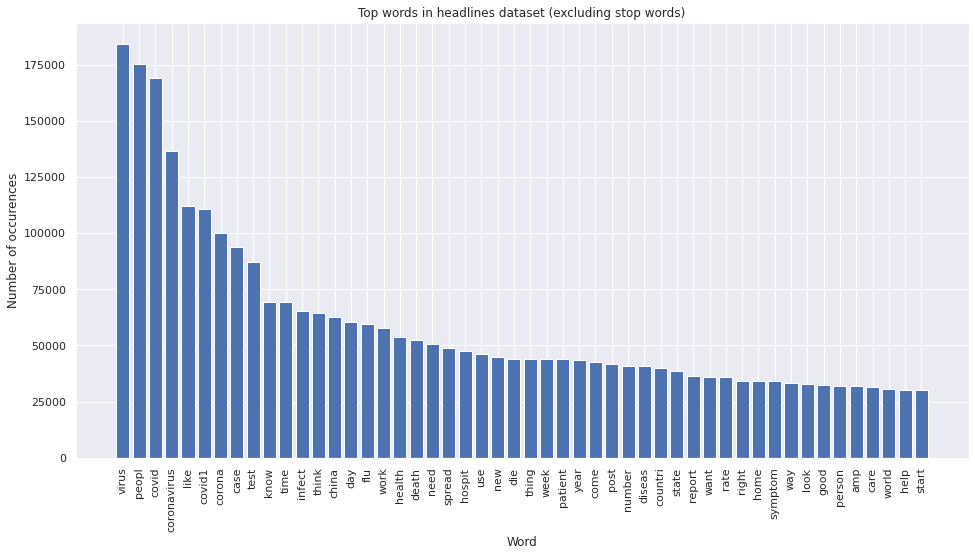

In [15]:
import matplotlib.pyplot as plt

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

from sklearn.feature_extraction.text import CountVectorizer
train['clean_content'].fillna('')
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=50,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=train['selected'].astype(str))

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


## step3: LDA data preparation 
---
### way1--using token1: Bag of words on the dataset 
First, create a dictionary from 'processed_docs' containing the **num of times a word appears** in the training set by passing 'processed_docs' to ``gesim.corpora.Dictionary()`` and calling it 'dictionary'

Second, **Gensim filter_extremes**--Filter out tokens that appear in 
* less than ``no_below`` docs, or
* more than ``no_above`` docs(fraction of total corpus size, not absolute #).
* after (1) (2）， keep only the first ``keep_n`` most frequent tokens (or keep all of None).

Third, **Gensim doc2bow** 
``doc2bow(document)`` covert doc into the bag-of-words, format = list of ( token_id, token_count). Each word is assumed to be a tokenized and normalized string. 

In [16]:
processed_docs = LS

In [17]:
'''
Create a dictionary containing the number of times a word appears in the training set
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 5 times
- words appearing in more than 5% of all documents
'''
dictionary.filter_extremes(no_below=5, no_above=0.05, keep_n= 100000)
    
'''
Create the Bag-of-words model for each document. i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]




##Preview BOW for our sample preprocessed document
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 26 ("human") appears 2 time.
Word 43 ("sar") appears 1 time.
Word 123 ("current") appears 1 time.
Word 168 ("status") appears 1 time.
Word 173 ("author") appears 1 time.
Word 188 ("epidemiolog") appears 1 time.
Word 189 ("evid") appears 1 time.
Word 191 ("fever") appears 1 time.
Word 199 ("inform") appears 1 time.
Word 221 ("transmiss") appears 1 time.
Word 225 ("worker") appears 1 time.
Word 236 ("check") appears 1 time.
Word 257 ("accord") appears 1 time.
Word 260 ("amp") appears 1 time.
Word 292 ("outbreak") appears 2 time.
Word 294 ("point") appears 1 time.
Word 309 ("wuhan") appears 1 time.
Word 318 ("mer") appears 1 time.
Word 342 ("investig") appears 1 time.
Word 355 ("appear") appears 1 time.
Word 379 ("discharg") appears 1 time.
Word 388 ("articl") appears 1 time.
Word 389 ("avail") appears 1 time.
Word 390 ("breath") appears 1 time.
Word 391 ("cctv") appears 1 time.
Word 392 ("comprehens") appears 1 time.
Word 393 ("difficulti") appears 1 time.
Word 394 ("event") appears

### way2--using token2: Prepare bi-grams and tri-grams + way1

In [18]:
'''
Prepare bi-grams and tri-grams
'''
from gensim.models import Phrases
tokens = train['selected'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

'''
Prepare objects for LDA gensim implementation
'''
from gensim import corpora
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]



In [19]:
'''
LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
''' 

lda_model1 =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dictionary_LDA)

'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for i,topic in lda_model1.show_topics(formatted=True, num_topics=4, num_words=10):
    print(str(i+1)+": "+ topic)
    print()

1: 0.027*"ongo" + 0.023*"week" + 0.019*"oversea" + 0.019*"stoke" + 0.016*"tell_bbc" + 0.016*"year_old_femal" + 0.016*"cat_vet" + 0.015*"origin" + 0.015*"advis" + 0.015*"pancreat"

2: 0.034*"cure" + 0.013*"upset" + 0.011*"hop" + 0.008*"good_news" + 0.008*"findet" + 0.008*"gesehen" + 0.007*"hinder" + 0.007*"shinjuku" + 0.007*"import_export" + 0.006*"characterist"

3: 0.009*"health_status" + 0.007*"new" + 0.007*"super" + 0.007*"prepar" + 0.006*"bacteria" + 0.005*"warn" + 0.005*"provid" + 0.005*"problem" + 0.005*"complet" + 0.005*"easili"

4: 0.008*"notifi" + 0.006*"memori" + 0.006*"compar" + 0.006*"cni" + 0.006*"light_recent" + 0.006*"seek_medic_attent" + 0.005*"complet" + 0.005*"phase" + 0.005*"better" + 0.005*"outsid_china"

5: 0.007*"hysteria" + 0.005*"moh_advis" + 0.005*"earlier" + 0.005*"hing" + 0.005*"medicin" + 0.005*"viral_respiratori_ill" + 0.004*"client" + 0.004*"ccv" + 0.004*"viral_genom" + 0.004*"accord"



In [30]:
for i,topic in lda_model1.show_topics(formatted=True, num_topics=5, num_words=20):
    print(str(i+1)+": "+ topic)
    print()

1: 0.027*"ongo" + 0.023*"week" + 0.019*"oversea" + 0.019*"stoke" + 0.016*"tell_bbc" + 0.016*"year_old_femal" + 0.016*"cat_vet" + 0.015*"origin" + 0.015*"advis" + 0.015*"pancreat" + 0.015*"wear_face_mask" + 0.013*"bug" + 0.013*"gut_feel" + 0.012*"social_medium" + 0.012*"lmao" + 0.012*"tonn" + 0.011*"instil_fear" + 0.011*"crucial" + 0.010*"inform" + 0.010*"leav"

2: 0.034*"cure" + 0.013*"upset" + 0.011*"hop" + 0.008*"good_news" + 0.008*"findet" + 0.008*"gesehen" + 0.007*"hinder" + 0.007*"shinjuku" + 0.007*"import_export" + 0.006*"characterist" + 0.006*"immigr" + 0.005*"gas" + 0.005*"del_paí" + 0.005*"journo" + 0.005*"greenpeac" + 0.005*"copi" + 0.005*"alibaba" + 0.004*"estuvo" + 0.004*"eye_protect" + 0.004*"reinfect"

3: 0.009*"health_status" + 0.007*"new" + 0.007*"super" + 0.007*"prepar" + 0.006*"bacteria" + 0.005*"warn" + 0.005*"provid" + 0.005*"problem" + 0.005*"complet" + 0.005*"easili" + 0.005*"handl" + 0.005*"adopt" + 0.005*"europ_asia" + 0.004*"blood" + 0.004*"medic_staff" + 0.004

## step4: Running LDA using Bad of Words
10 topics 
running LDA using CPU cores to parallelize and speed up model training.
parameters interpretation: 
* ``num_topics``;
* ``id2word`` a mapping from word ids to words. It is used to determine the vocabulary size, as well as for debugging and topic printing;
* ``workers`` is the # of extra processes to use for paralleization. Uses all avaliable cores by default. 
* ``alpha`` and ``eta`` are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)
* * ``Alpha`` is the per document topic distribution. High alpha: Every document has a mixture of all topics(documents appear similar to each other). Low alpha: Every document has a mixture of very few topics.
* * ``Eta`` is the per topic word distribution. High eta: Each topic has a mixture of most words(topics appear similar to each other). Low eta: Each topic has a mixture of few words.
* ``passes`` is the number of training passes through the corpus. For example, if the training corpus has 50,000 documents, chunksize is 10,000, passes is 2, then online training is done in 10 updates: #1 documents 0-9,999 #2 documents 10,000-19,999 #3 documents 20,000-29,999 #4 documents 30,000-39,999 #5 documents 40,000-49,999 #6 documents 0-9,999 #7 documents 10,000-19,999 #8 documents 20,000-29,999 #9 documents 30,000-39,999 #10 documents 40,000-49,999


-------

np.random.seed(123456)
num_topics = 5
%time lda_model2 = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))


for i,topic in lda_model2.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i+1) +": "+ topic)
    print()
    


**Classification of the topics**
Using the words in each topic and their corresponding weights, what categories were you able to infer?

---
# Allocation of topics in all documents 

In [20]:
# Allocation of topics1 in all documents
topics = [lda_model1[corpus[i]] for i in range(len(train))]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=5) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

train['topic1'] = document_topic.idxmax(axis=1)

train.topic1 = train.topic1.astype(int)+1


In [21]:
train.to_csv('topics.csv', index = False)

In [22]:
 train

,id,clean_content,POS_tokens,selected,detoken,topic1
0,0,honestly the the chinese climate and the high...,"[(honestly, RB), (the, DT), (the, DT), (chines...","[honest, chines, climat, high, densiti, peopl,...",honest chines climat high densiti peopl high d...,3
1,1,this is interesting i googled to try to figur...,"[(this, DT), (is, VBZ), (interesting, VBG), (i...","[googl, tri, figur, happen, fip, coronavirus, ...",googl tri figur happen fip coronavirus close r...,3
2,2,that symptom is not pathognomonic for rsv by a...,"[(that, DT), (symptom, NN), (is, VBZ), (not, R...","[symptom, pathognomon, rsv, mean, rhinovirus, ...",symptom pathognomon rsv mean rhinovirus like h...,3
3,3,immunity even if the dog has experienced a na...,"[(immunity, NN), (even, RB), (if, IN), (the, D...","[immun, dog, experi, natur, infect, solid, lon...",immun dog experi natur infect solid long last ...,3
4,4,if the two kittens lived together in the shelt...,"[(if, IN), (the, DT), (two, CD), (kittens, NNS...","[kitten, live, shelter, hous, high, high, like...",kitten live shelter hous high high like curren...,3
...,...,...,...,...,...,...
409471,409471,i have not seen the massachusetts answer for t...,"[(i, NNS), (have, VBP), (not, RB), (seen, VBN)...","[massachusett, answer, wisconsin, need, report...",massachusett answer wisconsin need report stim...,3
409472,409472,the article you posted says this amp x2...,"[(the, DT), (article, NN), (you, PRP), (posted...","[articl, post, amp, later, emerg, devic, send,...",articl post amp later emerg devic send facil m...,5
409473,409473,gt so it shows the quarantine is working no...,"[(gt, NNS), (so, IN), (it, PRP), (shows, VBZ),...","[quarantin, work, doubt, quarantin, reduc, dea...",quarantin work doubt quarantin reduc death qua...,3
409474,409474,is it possible to get some more specialised in...,"[(is, VBZ), (it, PRP), (possible, JJ), (to, TO...","[possibl, specialis, input, pre, print, group,...",possibl specialis input pre print group hubei ...,5


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## Combine all wine reviews into one big text
text = " ".join(review for review in train.clean_content.astype(str))
print("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords  = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#wordcloud.to_file("first_review.png")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('run_topics_and_transformations.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

----

In [23]:
# Which document are about topic 4
#document_topic.sort_values(4, ascending=False)[4].head(20)

### Looking at the distribution of topics in all content

%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [26]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model1, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

----
## validation 

In [29]:
#num = 100
#unseen_document = test_set.clean_content[num]
#print(unseen_document)

# Data preprocessing step for the unseen document
#bow_vector = dictionary.doc2bow(preprocess(unseen_document))

#for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
#    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

#print(newsgroups_test.target[num])

The model correctly classifies the unseen document with 'x'% probability to the X category.